
Download and extract files
https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

In [15]:
import zipfile

zip_path = r"..\..\data\raw\Dog_standford.zip"  

extract_path = r"..\..\data\raw"  

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)


# Data exploration 


In [97]:
import os

#list_breed_folders: contain a list of breeds
#for each breed: contain a list of images
#-----------------------------------------
#list_annotation_folders: contain a list of breeds
#for each breed: contain a list of annotations

list_image_folder_paths = os.path.join(extract_path, 'images\Images')


list_breed_folders = os.listdir(list_image_folder_paths)


list_annotation_folder_paths = os.path.join(extract_path, 'annotations\Annotation')

list_annotation_folders = os.listdir(list_annotation_folder_paths)

print(f"List Breed Folders: {list_breed_folders}")
print("\n")
print(f"List Annotation Folder: {list_annotation_folders}")



List Breed Folders: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n

In [120]:
from PIL import Image
# lists contain all the images/ annotation files 
list_images =[]
list_annotations=[]

#path for vissualize/read xml files
list_image_paths=[]
list_ann_paths=[]

# list image size
list_image_sizes=[]

# append all image
for folder in list_breed_folders:
    folder_path= os.path.join(extract_path,'images\Images',folder)
    tmp_list_img_path = os.listdir(folder_path) # This only contains 1 breed at 1 loop

    for img in tmp_list_img_path:
        img_path = os.path.join(folder_path, img)
        list_images.append(img)
        list_image_paths.append(img_path)
        
        # Get size of image
        with Image.open(img_path) as image:
            list_image_sizes.append(image.size)  # return (width, height)
        
# append all annotation files
for folder in list_annotation_folders:
    folder_path= os.path.join(extract_path,'annotations\Annotation',folder)
    tmp_list_ann_path = os.listdir(folder_path) # This only contains 1 breed at 1 loop
    
    for ann in tmp_list_ann_path:
        list_annotations.append(ann)
        
        # Store all the ann paths for long-term using
        list_ann_paths.append(os.path.join(folder_path,ann))
        
print(f"A sample in List image names: {list_images[0]}")
print(f"A sample in List annotation files: {list_annotations[0]}")
print(f"A sample in List Image Paths: {list_image_paths[0]}")
print(f"A sample in List Annotation Paths: {list_ann_paths[0]}")



A sample in List image names: n02085620_10074.jpg
A sample in List annotation files: n02085620_10074
A sample in List Image Paths: ..\..\data\raw\images\Images\n02085620-Chihuahua\n02085620_10074.jpg
A sample in List Annotation Paths: ..\..\data\raw\annotations\Annotation\n02085620-Chihuahua\n02085620_10074


# Check for image/ XML files

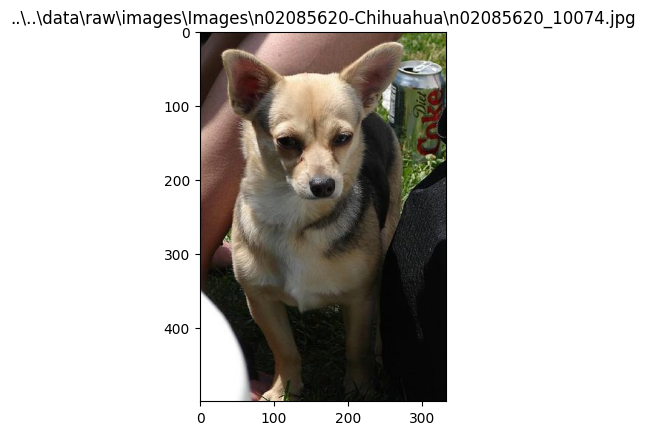

In [121]:
import matplotlib.pyplot as plt
from PIL import Image
# import numpy as np

# Vissualize image and print a sample folder
img = Image.open(list_image_paths[0])
plt.imshow(img)
plt.title(list_image_paths[0])
plt.show()

In [122]:
# Check for XML file
import xml.etree.ElementTree as ET

print("Details of an Annotation file: \n")
tree = ET.parse(list_ann_paths[0])
ET.dump(tree)



Details of an Annotation file: 

<annotation>
	<folder>02085620</folder>
	<filename>n02085620_10074</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>333</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>25</xmin>
			<ymin>10</ymin>
			<xmax>276</xmax>
			<ymax>498</ymax>
		</bndbox>
	</object>
</annotation>


# Check number, size of images

In [123]:
import numpy as np

# Check for number of breeds
num_breeds = len(list_breed_folders)
print(f"The number of breeds is :{num_breeds} \n")

# Check for number of images
num_images = len(list_images)

dic_breed_count = {}
for breed_folder in list_breed_folders:
    folder_path = os.path.join(list_image_folder_paths, breed_folder)
    dic_breed_count[breed_folder] = len(os.listdir(folder_path))
    
# print the number of image for each breed in a table format
print(f"{'Breed':<40} {'Number of Images':<20} {'Total Number of Breeds':<25}")
print('-' * 85)
first_row = True
for breed, count in dic_breed_count.items():
    if first_row:
        print(f"{breed:<40} {count:<20} {num_breeds:<25}")
        first_row = False
    else:
        print(f"{breed:<40} {count:<20} {'':<25}")
        
        


The number of breeds is :120 

Breed                                    Number of Images     Total Number of Breeds   
-------------------------------------------------------------------------------------
n02085620-Chihuahua                      152                  120                      
n02085782-Japanese_spaniel               185                                           
n02085936-Maltese_dog                    252                                           
n02086079-Pekinese                       149                                           
n02086240-Shih-Tzu                       214                                           
n02086646-Blenheim_spaniel               188                                           
n02086910-papillon                       196                                           
n02087046-toy_terrier                    172                                           
n02087394-Rhodesian_ridgeback            172                                           
n02

In [124]:
# Calculate the average image size
img_size = np.array(list_image_sizes)
print(f'Average image size: {img_size.mean(axis=0)}')

Average image size: [442.53187561 385.86122449]


In [125]:
print(len(os.listdir(folder_path)))

169


In [126]:
print(folder_path)

..\..\data\raw\images\Images\n02116738-African_hunting_dog
